In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.ticker import FuncFormatter 
%matplotlib inline

tableau10 = [(78, 121, 167), (242, 142, 43), (225, 87, 89), 
             (118, 183, 178), (89, 161, 79), (237, 201, 72), 
             (176, 122, 161), (225, 157, 167), (156, 117, 95), 
             (186, 176, 172)]

for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = (r / 255., g / 255., b / 255.) 

In [3]:
def calculate_savers(AGI, contribution):
    if AGI <= 18500:
        credit_rate = 0.5
    elif AGI <= 20000:
        credit_rate = 0.2
    elif AGI <= 30075:
        credit_rate = 0.1
    else:
        credit_rate = 0
    
    savers_credit = credit_rate*(contribution)
    if savers_credit >= 2000: 
        savers_credit = 2000
    
    return(credit_rate, savers_credit)

In [4]:
max_AGI = 30500
contribution_vec = range(0, max_AGI, 1)
savers_credit_50 = range(0, max_AGI, 1)
savers_credit_20 = range(0, max_AGI, 1)
savers_credit_10 = range(0, max_AGI, 1)

for i in contribution_vec:
    credit_rate, savers_credit_50[i] = calculate_savers(18500, contribution_vec[i])
    credit_rate, savers_credit_20[i] = calculate_savers(20000, contribution_vec[i])
    credit_rate, savers_credit_10[i] = calculate_savers(30075, contribution_vec[i])

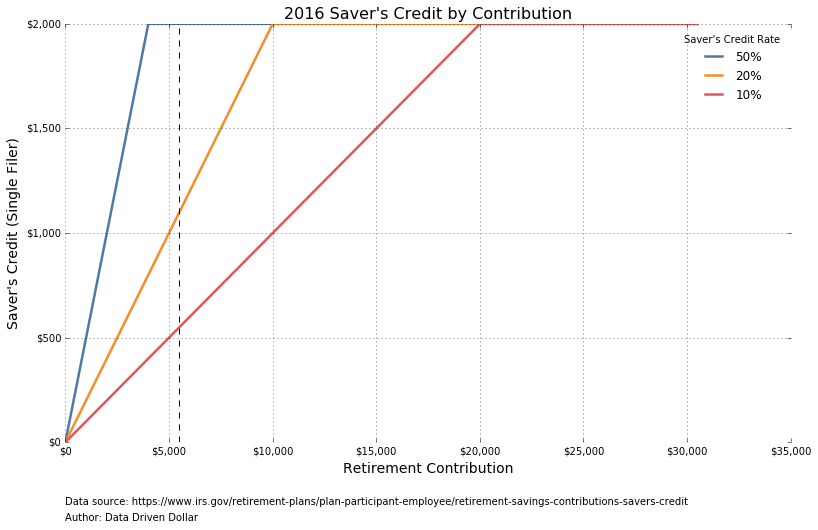

In [5]:
plt.figure(figsize = (13, 7.5))

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

credit_50pct, = plt.plot(contribution_vec, savers_credit_50, lw = 2.5, color=tableau10[0], label = '50%')
credit_20pct, = plt.plot(contribution_vec, savers_credit_20, lw = 2.5, color=tableau10[1], label = '20%')
credit_10pct, = plt.plot(contribution_vec, savers_credit_10, lw = 2.5, color=tableau10[2], label = '10%')
plt.grid(True)

plt.ylim([0, 2000])
plt.legend(title = "Saver's Credit Rate", frameon = False)

plt.xlabel('Retirement Contribution', fontsize = 14)
plt.ylabel("Saver's Credit (Single Filer)", fontsize = 14)
plt.title("2016 Saver's Credit by Contribution", fontsize = 16)

fmt = '${x:,.0f}'
tick = tkr.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)

plt.plot((5500, 5500), (0, 2000), 'k--')

plt.text(0, -300, "Data source: https://www.irs.gov/retirement-plans/plan-participant-employee/retirement-savings-contributions-savers-credit", 
         fontsize = 10)
plt.text(0, -375, "Author: Data Driven Dollar", fontsize = 10)

plt.savefig('plots/2016_single_savers.png', bbox_inches = 'tight')
plt.show()

## Tax Savings thanks to Savings Credit

In [6]:
# 2016 rates
# https://www.irs.com/articles/projected-us-tax-rates-2016
def calculate_tax(taxable_income):
    if taxable_income <= 9275:
        tax_bracket = 0.10
        tax_paid = tax_bracket*taxable_income
    elif taxable_income <= 37650:
        tax_bracket = 0.15
        tax_paid = 927.50 + tax_bracket*(taxable_income - 9275)
    elif taxable_income <= 91150:
        tax_bracket = 0.25
        tax_paid = 5183.75 + tax_bracket*(taxable_income - 37650)
    elif taxable_income <= 190150:
        tax_bracket = 0.28
        tax_paid = 18558.75 + tax_bracket*(taxable_income - 91150)
    elif taxable_income <= 413350:
        tax_bracket = 0.33
        tax_paid = 46278.75 + tax_bracket*(taxable_income - 190150)
    elif taxable_income <= 415050:
        tax_bracket = 0.35
        tax_paid = 119934.75 + tax_bracket*(taxable_income - 413350)
    else:
        tax_bracket = 0.396
        tax_paid = 120529.75 + tax_bracket*(taxable_income - 415050)
    
    return(tax_paid)  

In [7]:
def calculate_savers(AGI, contribution):
    if AGI <= 18500:
        credit_rate = 0.5
    elif AGI <= 20000:
        credit_rate = 0.2
    elif AGI <= 30075:
        credit_rate = 0.1
    else:
        credit_rate = 0
    
    savers_credit = credit_rate*(contribution)
    if savers_credit >= 2000: 
        savers_credit = 2000
    
    return(credit_rate, savers_credit)

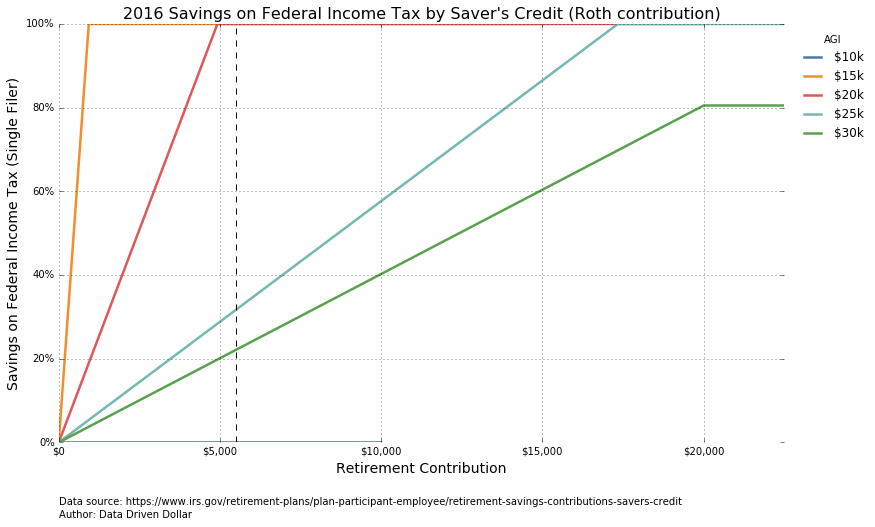

In [9]:
plt.figure(figsize = (13, 7.5))

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Calculate tax savings and plot
list_ = [0, 1, 2, 3, 4]
AGI_list = [10000, 15000, 20000, 25000, 30000]
for i_ in list_:
    AGI = AGI_list[i_]
    taxable_income = AGI - 6300 - 4050
    tax_due = calculate_tax(taxable_income)
    if tax_due < 0:
        tax_due = 0
    contribution_vec = range(0, AGI, 1)
    savers_credit = range(0, AGI, 1)
    tax_savings = range(0, AGI, 1)
    for i in contribution_vec:
        credit_rate, savers_credit[i] = calculate_savers(AGI, contribution_vec[i])
        if (tax_due == 0):
            tax_savings[i] = 0
        elif (savers_credit[i] >= tax_due):
            tax_savings[i] = 1
        else:
            tax_savings[i] = 1 - float(tax_due - savers_credit[i])/tax_due
            
    pct_savings, = plt.plot(contribution_vec, tax_savings, lw = 2.5, color=tableau10[i_], label = '$' + str(AGI)[:2] + 'k')

plt.grid(True)
plt.legend(title = "AGI", frameon = False, bbox_to_anchor=(1.125, 1))

plt.xlabel('Retirement Contribution', fontsize = 14)
plt.ylabel('Savings on Federal Income Tax (Single Filer)', fontsize = 14)
plt.title("2016 Savings on Federal Income Tax by Saver's Credit (Roth contribution)", fontsize = 16)

fmt = '${x:,.0f}'
tick = tkr.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.xlim([0, 22500])

plt.plot((5500, 5500), (0, 1), 'k--')
    
plt.text(0, -0.15, "Data source: https://www.irs.gov/retirement-plans/plan-participant-employee/retirement-savings-contributions-savers-credit", 
         fontsize = 10)
plt.text(0, -0.18, "Author: Data Driven Dollar", fontsize = 10)

plt.savefig('plots/2016_single_savers_tax.png', bbox_inches = 'tight')
plt.show()